# **Importando os dados:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('autos.csv', encoding = 'ISO-8859-1')

In [ ]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
360743,2016-03-26 20:56:02,Peugeot_206_75,privat,Angebot,3699,control,kleinwagen,2007,manuell,75,2_reihe,80000,9,benzin,peugeot,nein,2016-03-26 00:00:00,0,49635,2016-04-06 12:17:28
106497,2016-04-05 00:53:22,Opel_Corsa_Tuev_bis_Ende_2016,privat,Angebot,2200,control,kleinwagen,2003,manuell,75,corsa,125000,0,NaN,opel,nein,2016-04-04 00:00:00,0,66539,2016-04-05 07:44:24
52675,2016-03-19 19:50:48,Jaguar_XJ6_2.7_Twin_Turbo_Diesel,privat,Angebot,12900,control,limousine,2006,automatik,207,andere,150000,3,diesel,jaguar,nein,2016-03-19 00:00:00,0,68169,2016-04-03 08:15:24
205010,2016-03-13 18:25:23,Chevrolet_Matiz,privat,Angebot,3200,control,kleinwagen,2006,manuell,0,matiz,125000,4,benzin,chevrolet,nein,2016-03-13 00:00:00,0,60437,2016-04-05 20:46:44
369567,2016-04-02 13:44:45,Mercedes_Benz_E_220_CDI,privat,Angebot,6200,test,limousine,2002,manuell,150,e_klasse,150000,3,diesel,mercedes_benz,nein,2016-04-02 00:00:00,0,70619,2016-04-06 11:45:29


In [ ]:
df = df.sample(1000)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 360743 to 331260
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          1000 non-null   object
 1   name                 1000 non-null   object
 2   seller               1000 non-null   object
 3   offerType            1000 non-null   object
 4   price                1000 non-null   int64 
 5   abtest               1000 non-null   object
 6   vehicleType          887 non-null    object
 7   yearOfRegistration   1000 non-null   int64 
 8   gearbox              947 non-null    object
 9   powerPS              1000 non-null   int64 
 10  model                949 non-null    object
 11  kilometer            1000 non-null   int64 
 12  monthOfRegistration  1000 non-null   int64 
 13  fuelType             913 non-null    object
 14  brand                1000 non-null   object
 15  notRepairedDamage    791 non-null    object
 16 

**Vamos retirar algumas Features, algumas delas contém 2 tipos de amostras, sendo que um dos tipos só tem 1 amostra, não será válido, por exemplo, a "seller" é dividida em privada e comercial, só existe 1 amostra como comercial.**

In [ ]:
df.drop(columns=["name", "dateCrawled", "dateCreated", "lastSeen", "postalCode", "seller", "offerType", "nrOfPictures"], inplace=True)

In [ ]:
df

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
360743,3699,control,kleinwagen,2007,manuell,75,2_reihe,80000,9,benzin,peugeot,nein
106497,2200,control,kleinwagen,2003,manuell,75,corsa,125000,0,NaN,opel,nein
52675,12900,control,limousine,2006,automatik,207,andere,150000,3,diesel,jaguar,nein
205010,3200,control,kleinwagen,2006,manuell,0,matiz,125000,4,benzin,chevrolet,nein
369567,6200,test,limousine,2002,manuell,150,e_klasse,150000,3,diesel,mercedes_benz,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
310268,400,test,kleinwagen,1996,automatik,75,polo,60000,0,benzin,volkswagen,NaN
348968,9990,control,kombi,2007,manuell,170,octavia,90000,11,diesel,skoda,nein
137663,7800,control,kombi,2009,NaN,140,passat,150000,0,diesel,volkswagen,NaN
236576,6900,test,kleinwagen,2008,manuell,75,500,125000,5,diesel,fiat,nein


## **RANDOM FOREST**

In [ ]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
#Separando o que é features e target:
X = df.drop(columns="price")
y = df["price"]

# Dividindo em dados de teste e dados de treino, peguei 20% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# ==========================================================
# Tratamento das features numéricas
pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="median")),
                              ("std", StandardScaler())])

features_num = X_train.select_dtypes(include=np.number).columns.tolist()

# ==========================================================
# Tratando as features categóricas. Os valores nulos (NaN) serão preenchidos pelos dados mais constantes e posteriormente codificaremos todas elas com o Ordinal Enconder. 

pipe_features_oe = Pipeline([("input_cat_oe", SimpleImputer(strategy="constant", fill_value="unknown")),
                            ("ordinal", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

features_oe = ["vehicleType", "model", "fuelType", "brand"]

# ==========================================================
# Tratando as features categóricas. Os valores nulos (NaN) serão preenchidos pelos dados por "unknown" e posteriormente codificaremos todas elas com o One Hot Encoder.

pipe_features_ohe = Pipeline([("input_cat_ohe", SimpleImputer(strategy="constant", fill_value="unknown")),
                            ("OneHot", OneHotEncoder(handle_unknown='ignore'))])

features_ohe = ["abtest", "gearbox", "notRepairedDamage"]
# ==========================================================
# Pré-processador => Pegando as pipelines anteriores e unindo-as.
pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                     ("transf_cat_oe", pipe_features_oe, features_oe),
                                     ("transf_cat_ohe", pipe_features_ohe, features_ohe)])

# ==========================================================
# Pipeline final, usando o pré-processador e o estimador que queremos utilizar, neste caso o XGBoost para regressão.
pipe_rfr = Pipeline([("pre_processador", pre_processador),
                     ("rfr", RandomForestRegressor(random_state=42))])

# ==========================================================
#Vamos dividir em splits.
splitter = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

#Motando a grade geral de parâmetros.
params_grid_rfr = {"rfr__n_estimators": [5000],
                  "rfr__max_depth": [10],
                  "rfr__criterion": ["squared_error"],
                  "rfr__max_features": ["sqrt"]}

autos_grid_rfr = GridSearchCV(estimator=pipe_rfr,
                       param_grid=params_grid_rfr,
                       scoring="r2",
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1)

autos_grid_rfr.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processador',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std',
                                                                                          StandardScaler())]),
                                                                         ['yearOfRegistration',
                                                                          'powerPS',
                                                                          'kilometer',
                                                                         

In [ ]:
autos_grid_rfr.best_params_

{'rfr__criterion': 'squared_error',
 'rfr__max_depth': 10,
 'rfr__max_features': 'sqrt',
 'rfr__n_estimators': 5000}

In [ ]:
autos_rfr_results = pd.DataFrame(autos_grid_rfr.cv_results_)
autos_rfr_results.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfr__max_depth,param_rfr__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,95.551967,1.785530,1.043722,0.028641,5,1000,"{'rfr__max_depth': 5, 'rfr__n_estimators': 1000}",0.623286,0.647585,0.642960,0.613180,0.642981,0.633998,0.013370,1
3,214.201045,5.603015,1.614836,0.313081,5,2500,"{'rfr__max_depth': 5, 'rfr__n_estimators': 2500}",0.623046,0.647295,0.642961,0.612791,0.642401,0.633699,0.013394,2
1,117.223494,1.467186,1.506213,0.154547,2,2500,"{'rfr__max_depth': 2, 'rfr__n_estimators': 2500}",0.293213,0.309523,0.311092,0.269395,0.301983,0.297041,0.015209,3
0,48.932830,0.264077,0.703105,0.039526,2,1000,"{'rfr__max_depth': 2, 'rfr__n_estimators': 1000}",0.293245,0.309500,0.311116,0.269301,0.301968,0.297026,0.015242,4


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Predições de treino
y_pred_train_rfr = autos_grid_rfr.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train_rfr):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train_rfr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_rfr)):.2f}")

# Predições de teste
y_pred_test_rfr = autos_grid_rfr.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test_rfr):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_rfr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_rfr)):.2f}") 


Métricas de treino:

R^2: 0.91
MAE: 1198.00
RMSE: 3262.89

Métricas de teste:

R^2: 0.75
MAE: 1941.82
RMSE: 3491.51


In [ ]:
import pickle

In [ ]:
with open("autos_grid_rfr.pkl", "wb") as f:
    pickle.dump(autos_grid_rfr, f)

In [ ]:
with open("autos_grid_rfr.pkl", "rb") as f:
    
    autos_grid_rfr = pickle.load(f)

**Vamos criar uma tabela com a porcentagem de acertos para cada dado**

In [ ]:
tabela_rfr = pd.DataFrame()

In [ ]:
tabela_rfr["valores reais"] = y_test

In [ ]:
tabela_rfr["valores preditos"] = y_pred_test_rfr

In [ ]:
tabela_rfr

,valores reais,valores preditos
21436,9999,9516.790880
362001,699,2422.664406
253269,200,1728.683282
299396,5500,4672.457373
182938,899,1503.931186
...,...,...
41107,900,1955.368139
50784,5000,5714.357131
93146,4190,2926.684773
296845,4500,3309.897033


**Vamos criar uma tabela com a porcentagem de acertos para cada dado**

In [ ]:
tabela_rfr = pd.DataFrame()

In [ ]:
tabela_rfr["valores reais"] = y_test

In [ ]:
tabela_rfr["valores preditos"] = y_pred_test_rfr

In [ ]:
tabela_rfr["porcentagem de acerto %"]= (y_test/y_pred_test_rfr)*100

In [ ]:
lista_num = []
for c in tabela_rfr["porcentagem de acerto %"]:
  if c > 100:
    num = abs(c - 200)
    lista_num.append(num)
  else:
    num = c
    lista_num.append(num)
  

tabela_rfr["porcentagem de acerto %"]= lista_num

In [ ]:
tabela_rfr

,valores reais,valores preditos,porcentagem de acerto %
21436,9999,9516.790880,94.933070
362001,699,2422.664406,28.852531
253269,200,1728.683282,11.569499
299396,5500,4672.457373,82.288921
182938,899,1503.931186,59.776671
...,...,...,...
41107,900,1955.368139,46.027138
50784,5000,5714.357131,87.498906
93146,4190,2926.684773,56.834599
296845,4500,3309.897033,64.044109


## **XGBOOST**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
#Separando o que é features e target:
X = df.drop(columns="price")
y = df["price"]

# Dividindo em dados de teste e dados de treino, peguei 20% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Iniciando a construção da Pipeline:
# ==========================================================
#Primeiro vamos tratar as features numéricas. Tratando os valores nulos (NaN) e escalonando já que a variância entre as features é grande.
pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")),
                              ("std", StandardScaler())])

features_num = X_train.select_dtypes(include=np.number).columns.tolist()
# ==========================================================
# Tratando as features categóricas. Os valores nulos (NaN) serão preenchidos pelos dados mais constantes e posteriormente codificaremos todas elas com o One Hot Encoder e Ordinal Enconder. Percebemos que o One Hot Encoder 
# é para features categóricas binárias e o Ordinal Enconder para features categóricas ordinais (não binários)

pipe_features_oe = Pipeline([("input_cat_oe", SimpleImputer(strategy="constant", fill_value="unknown")),
                             ("ordinal", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

features_oe = ["vehicleType", "model", "fuelType", "brand"]

# ==========================================================
# Tratando as features categóricas. Os valores nulos (NaN) serão preenchidos pelos dados por "unknown" e posteriormente codificaremos todas elas com o One Hot Encoder.

pipe_features_ohe = Pipeline([("input_cat_ohe", SimpleImputer(strategy="constant", fill_value="unknown")),
                            ("OneHot", OneHotEncoder(handle_unknown='ignore'))])

features_ohe = ["abtest", "gearbox", "notRepairedDamage"]

# ==========================================================
# Pré-processador => Pegando as pipelines anteriores e unindo-as.
pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                     ("transf_cat_oe", pipe_features_oe, features_oe),
                                     ("transf_cat_ohe", pipe_features_ohe, features_ohe)])

# ==========================================================
# Pipeline final, usando o pré-processador e o estimador que queremos utilizar, neste caso o XGBoost para regressão.
pipe_xgbr = Pipeline([("pre_processador", pre_processador),
                     ("xgbr", XGBRegressor(eval_metric='logloss', random_state=42))])

# ==========================================================
#Vamos dividir em splits para ter mais variedade no processamento dos dados.
splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

#Montando a grade de parâmetros do estimador (XGBoost)
params_grid_xgbr = {"xgbr__n_estimators": [1000, 5000, 10000],
                   "xgbr__max_depth": [2, 3, 5, 8],
                   "xgbr__learning_rate": [0.1, 0.01, 0.001],
                   "xgbr__colsample_bytree": [0.5],
                   "xgbr__subsample": [0.5]}


#Motando a grade geral de parâmetros.
auto_grid_xgbr = GridSearchCV(estimator=pipe_xgbr,
                       param_grid=params_grid_xgbr,
                       scoring="r2",
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1)

auto_grid_xgbr.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[04:56:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processador',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer()),
                                                                                         ('std',
                                                                                          StandardScaler())]),
                                                                         ['yearOfRegistration',
                                                                          'powerPS',
                                                                          'kilometer',
                                                                          'monthOfRegistrat

In [ ]:
auto_grid_xgbr.best_params_

{'xgbr__colsample_bytree': 0.5,
 'xgbr__learning_rate': 0.001,
 'xgbr__max_depth': 5,
 'xgbr__n_estimators': 5000,
 'xgbr__subsample': 0.5}

In [ ]:
xgbr_results = pd.DataFrame(auto_grid_xgbr.cv_results_)
xgbr_results.sort_values(by=["rank_test_score"])

In [ ]:
# Predições de treino
y_pred_train_xgbr = auto_grid_xgbr.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train_xgbr):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train_xgbr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_xgbr)):.2f}")

# Predições de teste
y_pred_test_xgbr = auto_grid_xgbr.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test_xgbr):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_xgbr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_xgbr)):.2f}") 


Métricas de treino:

R^2: 0.92
MAE: 1264.73
RMSE: 2489.66

Métricas de teste:

R^2: 0.81
MAE: 1857.17
RMSE: 3454.10


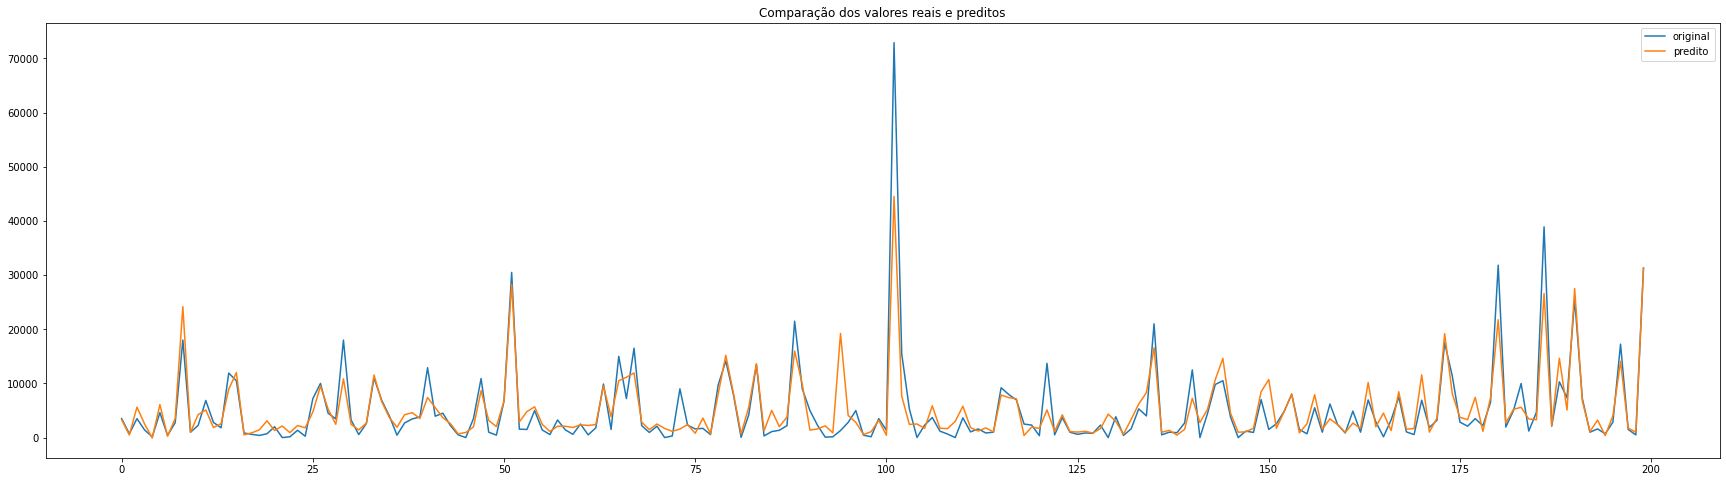

In [ ]:
plt.figure(figsize=(30,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_test_xgbr, label="predito")
plt.title("Comparação dos valores reais e preditos")
plt.legend()
plt.show();

In [ ]:
import pickle

In [ ]:
with open("auto_grid_xgbr.pkl", "wb") as f:
    pickle.dump(auto_grid_xgbr, f)

In [ ]:
with open("auto_grid_xgbr.pkl", "rb") as f:
    
    auto_grid_xgbr = pickle.load(f)

In [ ]:
y_pred_test_xgbr

In [ ]:
y_test.values

array([2600000.,  620000., 1000000., ..., 2450000., 1155000., 1040000.])

**Vamos criar uma tabela com a porcentagem de acertos para cada dado**

In [ ]:
tabela_xgbr = pd.DataFrame()

In [ ]:
tabela_xgbr["valores reais"] = y_test

In [ ]:
tabela_xgbr["valores preditos"] = y_pred_test_xgbr

In [ ]:
tabela_xgbr["porcentagem de acerto %"]= (y_test/y_pred_test_xgbr)*100

In [ ]:
lista_num = []
for c in tabela_xgbr["porcentagem de acerto %"]:
  if c > 100:
    num = abs(c - 200)
    lista_num.append(num)
  else:
    num = c
    lista_num.append(num)
  

tabela_xgbr["porcentagem de acerto %"]= lista_num

In [ ]:
tabela_xgbr

,valores reais,valores preditos,porcentagem de acerto %
197774,3500,3280.881104,93.321340
201204,700,474.646576,52.521848
279969,3500,5620.508301,62.271948
224886,1400,2500.901855,55.979806
128399,150,-84.158684,-178.234727
...,...,...,...
229142,2850,4033.769775,70.653512
279800,17250,14064.619141,77.351816
126485,1500,1760.923584,85.182572
130355,500,994.183044,50.292550


#**INTERPRETANDO O MODELO GLOBALMENTE**

**Para a interpretação só podemos considerar as features numéricas, vamos retirar as features categóricas:**

**SHAP**

In [ ]:
df = pd.read_csv('autos.csv', encoding = 'ISO-8859-1')

In [ ]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
df = pd.read_csv('autos.csv', encoding = 'ISO-8859-1')
df = df.select_dtypes(include=np.number)
#features_num = X_train.select_dtypes(include=np.number).columns.tolist()
X = df.drop(columns=["price"])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [ ]:
!pip install shap
import shap

In [ ]:
xgbr = XGBRegressor().fit(X_train, y_train)

[05:14:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
explainer = shap.TreeExplainer(xgbr)

In [ ]:
shap_vals = explainer.shap_values(X_train)

**Temos abaixo as Features que mais impactaram na escolha dos valores preditivos para todos os dados:**

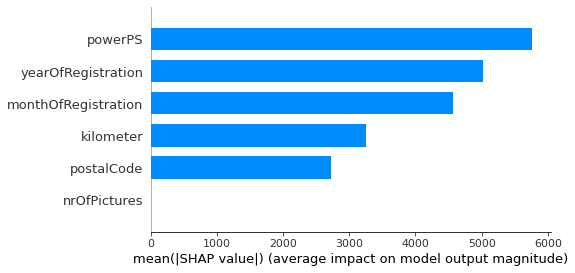

In [ ]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")